In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [41]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import opendatasets as od

In [43]:
od.download("https://www.kaggle.com/competitions/titanic/data")

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [44]:
df = pd.read_csv("/content/titanic/train.csv")

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
### Checking for null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

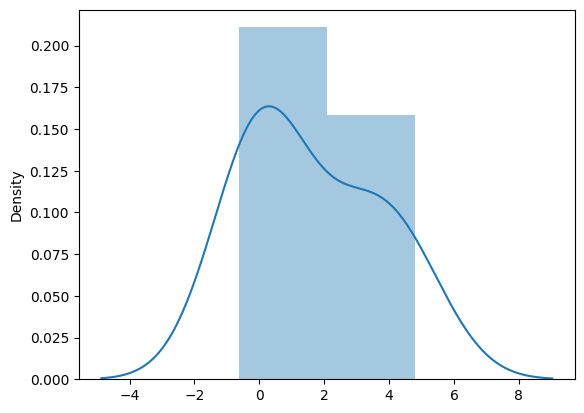

In [49]:
### Checking data distribution

sns.distplot(df.skew(),kde=True)
plt.show()

 ***Handling Null Values***

In [50]:
### Dropping Cabin Column as more than 75% of the data are missing

df.drop("Cabin",axis=1,inplace=True)

In [51]:
### Dealing with other columns which have null values ...

df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [52]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**EDA (Exprolatory Data Analysis) **


In [54]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [55]:
### Dropping irrelevant column

df.drop(["PassengerId", "Name","Ticket"], axis=1, inplace=True)

**Univariate Analysis**

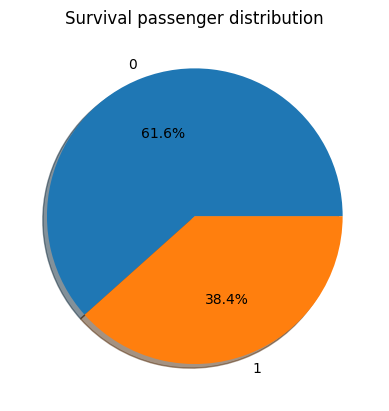

In [56]:
### Checking the Survival Ratios

value_counts = df["Survived"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',shadow = True)
plt.title("Survival passenger distribution")
plt.show()

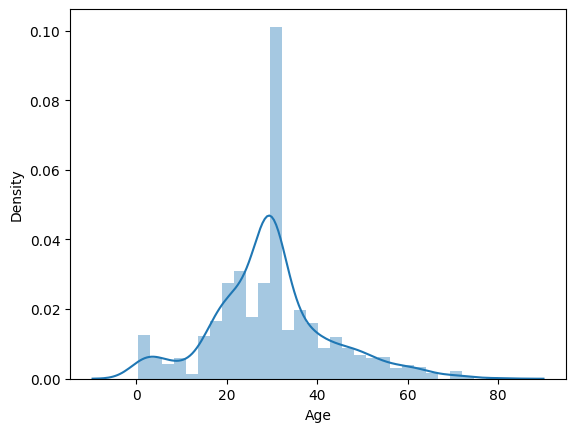

In [57]:
## Checking age distribution

sns.distplot(df["Age"],kde=True)
plt.show()

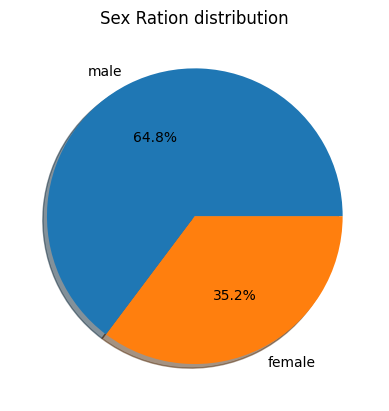

In [58]:
### Checking gender distribution in the dataset

value_counts = df["Sex"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',shadow = True)
plt.title("Sex Ration distribution")
plt.show()

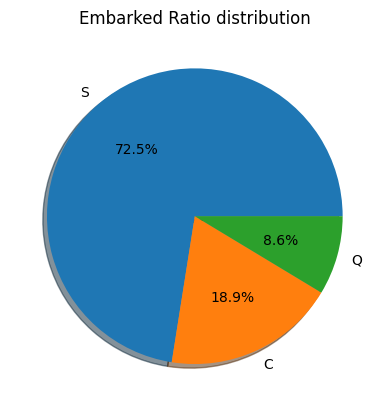

In [59]:
### Checking Embarked ratio distribution

value_counts = df["Embarked"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',shadow = True)
plt.title("Embarked Ratio distribution")
plt.show()

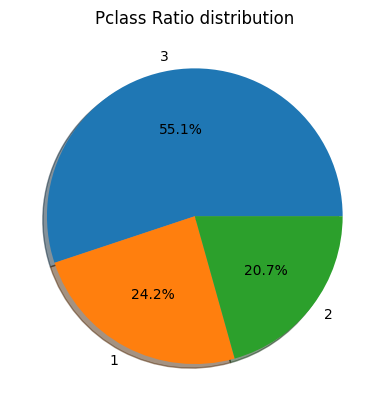

In [60]:
### Checking distribution of pclass

value_counts = df["Pclass"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',shadow = True)
plt.title("Pclass Ratio distribution")
plt.show()

**Bivariate Analysis**

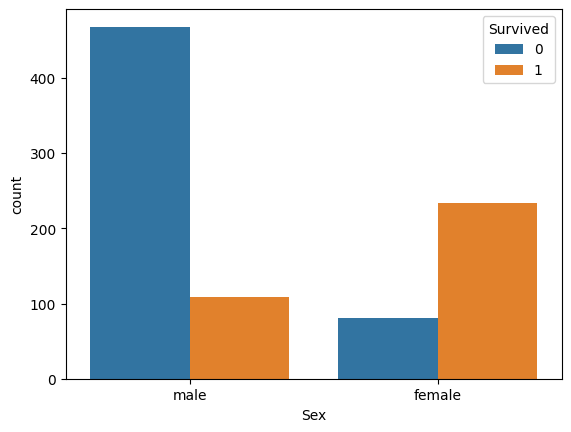

In [61]:
### Checking Age relationship with survival

sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

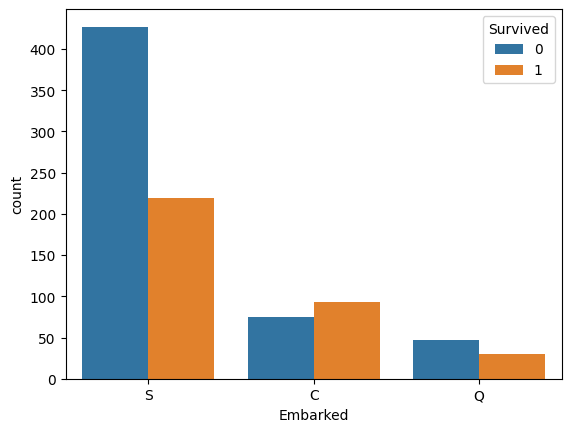

In [62]:
### Checking Embarked relationship with survival

sns.countplot(x="Embarked",hue="Survived",data=df)
plt.show()

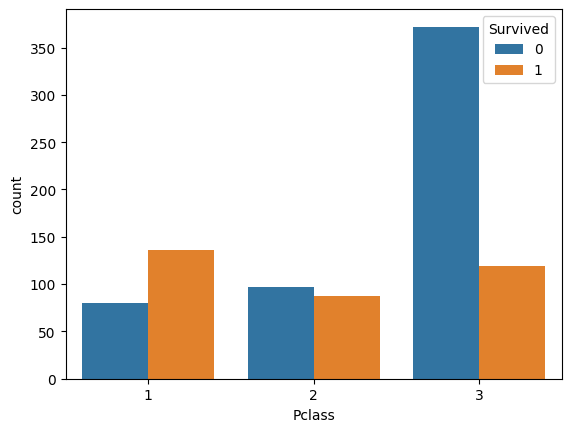

In [63]:
### Checking Pclass distribution with survival

sns.countplot(x="Pclass", hue ="Survived",data=df)
plt.show()

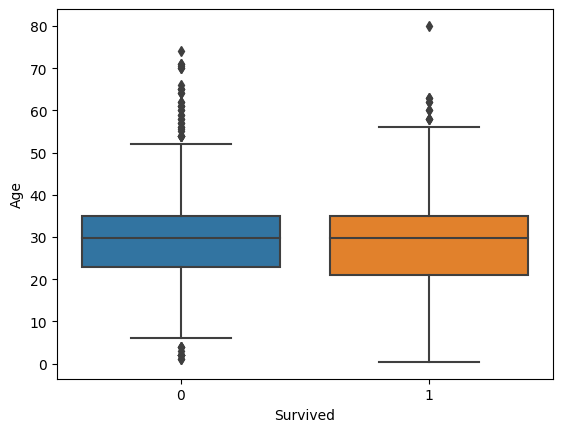

In [64]:
### Checking age impact of survival

sns.boxplot(x='Survived', y='Age', data=df)
plt.show()

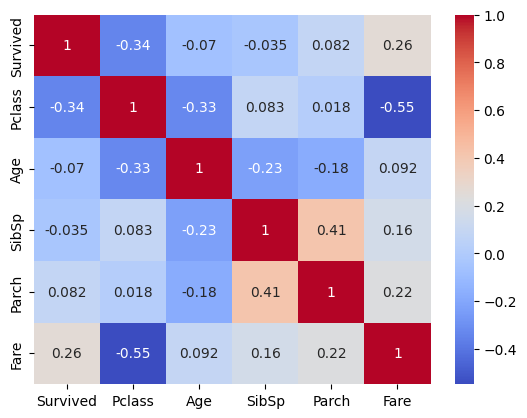

In [65]:
### Checking the correlation between columns

sns.heatmap(df.corr(),annot= True,cmap="coolwarm")
plt.show()

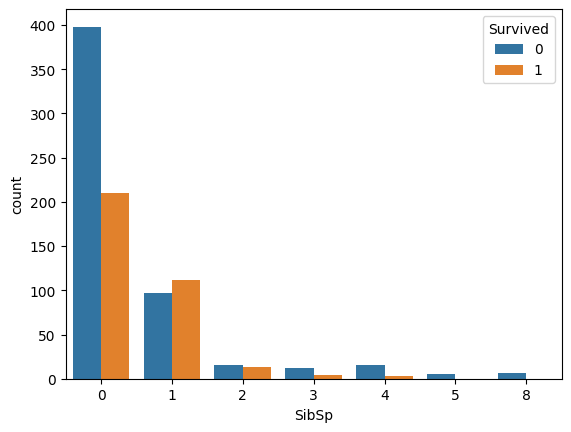

In [66]:
sns.countplot(x="SibSp",hue="Survived",data=df)
plt.show()

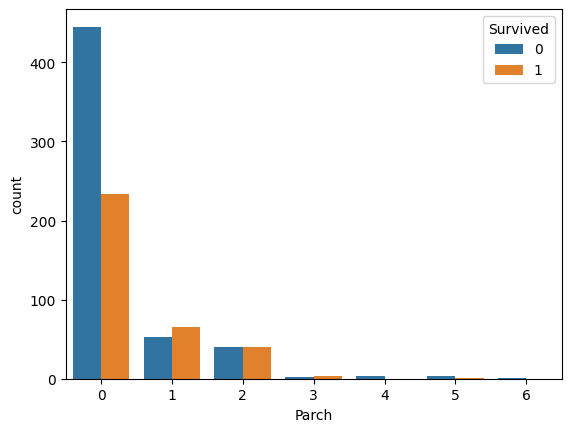

In [67]:
sns.countplot(x="Parch",hue="Survived",data=df)
plt.show()

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Feature Engenering**

In [69]:
### Dealing with catagorical columns

encoded_df = pd.get_dummies(df[["Sex", "Embarked"]], drop_first=True)
df = pd.concat([df, encoded_df], axis=1)
df.drop(["Sex", "Embarked"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [70]:
### Seprating Dependent & Independent cols

X = df.drop(["Survived"],axis=1)
y = df["Survived"].values

In [71]:
### Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [72]:
X = scaler.fit_transform(X)
X

array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.62380254]])

In [73]:
### Spliting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
# Checking the shape of the training and test sets

print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (596, 8)
Shape of the training output data: (596,)
Shape of the test input data: (295, 8)
Shape of the test output data: (295,)


In [75]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
### Importing the required libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt

In [80]:
def build_model(hp):
    model = Sequential()
    units = 8
    activation = hp.Choice("activation", ["relu", "tanh", "sigmoid", "softmax"])
    model.add(Dense(units=units, activation=activation, input_shape=(8,)))

    for _ in range(hp.Int('num_hidden_layers', 1, 10)):
        units = hp.Choice('hidden_units', [8, 16, 32, 64, 128, 256])
        activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid', 'softmax'])
        model.add(Dense(units=units, activation=activation))
        model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))  # Adding dropout layer

    model.add(Dense(units=1, activation="sigmoid"))

    optimizer = hp.Choice("optimizer", ["adam", "RMSprop", "SGD", "Adagrad"])
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    return model


In [81]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=100)


In [82]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [83]:
tuner.search(X_train, y_train, validation_data=(X_train, y_train), epochs=50, callbacks=[early_stopping])

Trial 100 Complete [00h 00m 11s]
val_accuracy: 0.6275168061256409

Best val_accuracy So Far: 0.8724831938743591
Total elapsed time: 00h 20m 55s


In [84]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [88]:
best_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
19/19 [==============================] - 3s 5ms/step - loss: 0.3463 - accuracy: 0.8607
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3381 - accuracy: 0.8674
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8574
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3411 - accuracy: 0.8574
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3333 - accuracy: 0.8591
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8624
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3384 - accuracy: 0.8523
Epoch 8/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3330 - accuracy: 0.8641
Epoch 9/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3374 - accuracy: 0.8641
Epoch 10/50
19/19 [==============================] - 0s 5ms/step - loss: 0.3340 - accuracy: 0.8591
Epoch 11/50
19/19 [

In [89]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.6341 - accuracy: 0.8068


In [90]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy Score: {accuracy}")

10/10 [==============================] - 1s 3ms/step
Accuracy Score: 0.8067796610169492
